# Mnist 데이터 가져오기

In [6]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


x_train, y_train에 훈련데이터의 데이터와 라벨이 각각 저장되어있다.
- 훈련데이터는 6만장에 28 * 28로 되어있다.
- 라벨은 6만개로 되어있다. 

### 시각화하기

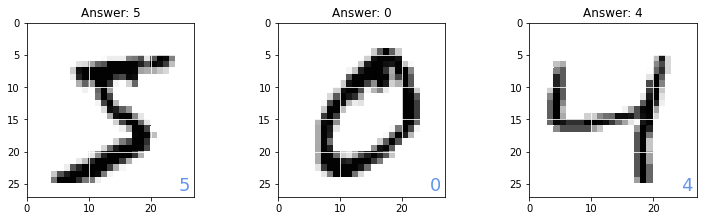

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue', fontsize=18)
    plt.title("Answer: {}".format(y_train[id]))
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

훈련 데이터를 시각화하였다. 
- x_train[배치사이즈, 행, 열]

### 2층의 Mlp를 정의하기

In [20]:
from keras.utils import np_utils


x_train = x_train.reshape(60000, 784) # (A) mlp이기 때문에 1차원으로 평탄화해야한다.
x_train = x_train.astype('float32') # (B) type을 바꾸기
x_train = x_train / 255 # (C) 픽셀값을 0~1 사이 값으로 바꾸기
num_classes = 10 #정답은 10개이다. 
y_train = np_utils.to_categorical(y_train, num_classes) # (D)


x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(60000, 784)    
0부터 255까지 존재하는 픽셀값을 0~1사이 값으로 수정 (정규화라고 한다.)



np_utils.to_categorical(y_train, num_classes)는 One-hot encoding을 하는 역할을 한다.  
- to_categorical은 num_classes에 기반하여 10개의 리스트를 만든 다음, 
- x_train에서 해당하는 라벨의 위치에 1을 부여하고 나머지는 0을 준다.



In [21]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax')) # (C)


model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                12560     
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [16]:
model = Sequential([
Dense(16, input_dim=784, activation='sigmoid'), # (B)
Dense(10, activation='softmax')])


model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


Sequential은 torch에서 nn처럼 층들을 묶는 역할을 한다.    
처음에는 16개를 출력하고 2번째는 카테고리의 개수인 10개만큼 출력한다.   
Dense는 mlp인 다층 퍼셉트론을 의미한다.   
- 처음에는 16개의 출력을 만들며, 첫번째 층이기 때문에 input_dim인 들어가는 차원을 정의하였다.   
- 두번째 층은 10개이며 소프트 맥스를 사용하였다. 

model.compile을 이용해 모델에서 loss함수와 optimizer을 정의하였다. 
- categorical_crossentropy를 사용(로그우도 사용)
- adam을 사용

In [22]:
import time


startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 12ms/step - loss: 2.0529 - accuracy: 0.3792 - val_loss: 1.7629 - val_accuracy: 0.6128
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 1.5675 - accuracy: 0.7192 - val_loss: 1.3885 - val_accuracy: 0.7925
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 1.2583 - accuracy: 0.8094 - val_loss: 1.1309 - val_accuracy: 0.8331
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.0402 - accuracy: 0.8409 - val_loss: 0.9453 - val_accuracy: 0.8589
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.8821 - accuracy: 0.8593 - val_loss: 0.8094 - val_accuracy: 0.8732
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7653 - accuracy: 0.8706 - val_loss: 0.7081 - val_accuracy: 0.8818
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6775 - accuracy: 0.8785 - val_loss: 0.6316 - val_accuracy: 0.8880
Epoch 8/10
60/60 [


model.fit로 훈련을 정의한다. 
- 들어갈 훈련데이터와 라벨
- epoch는 10번 실행 
- 배치 사이즈도 여기서 정의한다. 
- 검증용 데이터와 라벨도 넣을 수 있다.    

model.evaluate로 시험을 볼 수 있다.


In [26]:
import pandas as pd
history1 = pd.DataFrame(history.history)
print(history1)

       loss  accuracy  val_loss  val_accuracy
0  2.052872  0.379167  1.762934        0.6128
1  1.567515  0.719150  1.388530        0.7925
2  1.258281  0.809400  1.130852        0.8331
3  1.040204  0.840900  0.945286        0.8589
4  0.882095  0.859317  0.809368        0.8732
5  0.765341  0.870650  0.708105        0.8818
6  0.677535  0.878467  0.631638        0.8880
7  0.610543  0.884417  0.572752        0.8931
8  0.558106  0.889850  0.526479        0.8967
9  0.516369  0.894000  0.489177        0.9005



history 살펴보기
history.history에는 epoch마다 발생한 loss, accuracy, val_loss, val_accuracy가 있다.

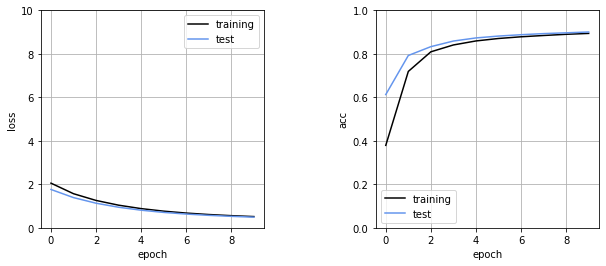

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

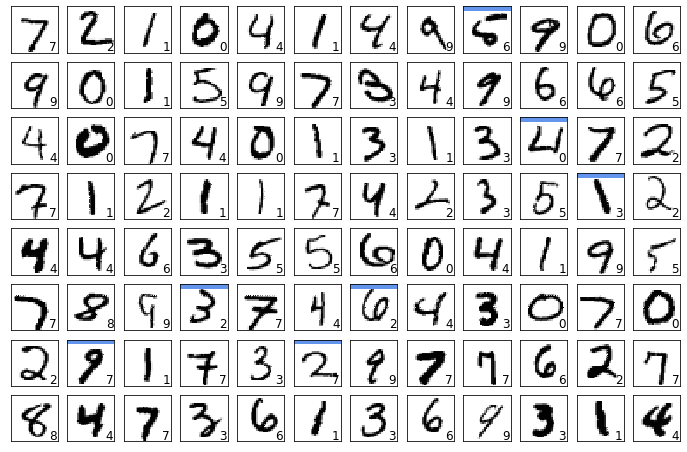

In [28]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()


y = model.predict(x_test)을 통해 모델에서 x_test를 예측한 
y의 값이 나온다.  

show_prediction이란 함수를 정의하였다.  
- 96장을 8 * 12 로 정의하여 그렸다.
- x를 다시 28 * 28로 만들어서 그림을 그렸다. 

np.argmax란 리스트에서 제일 큰 값의 인덱스를 내보내는 함수이다.   
 원핫 인코딩이 되어있기 때문에 np.argmax(y_test)는  
10개의 원-핫 인코딩된 y_test중 1을 가진 값의 인덱스를 꺼내는 함수이다.   

예측한 값과 정답이 다르면, 틀린 값에는 파란색 선이 생긴다.
  

Activation Function(활성함수)   
시그모이드는 0~1사이 값을 내보내는 것은 좋지만,   
층이 깊어지면 깊어 질수록 gradient 오차역전파가   
사라지는 현상이 있다. 그래서 relu()를 사용한다.   
relu()는 0이하는 무조건 0, 그외에는 자신의 값이 나오게 만든다.

In [29]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


model = Sequential([
Dense(16, input_dim=784, activation='relu'),# (A)
Dense(10, activation='softmax')])

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 2s 15ms/step - loss: 1.5609 - accuracy: 0.5180 - val_loss: 0.9390 - val_accuracy: 0.8044
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6874 - accuracy: 0.8425 - val_loss: 0.5028 - val_accuracy: 0.8774
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.4587 - accuracy: 0.8821 - val_loss: 0.3947 - val_accuracy: 0.9005
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3826 - accuracy: 0.8975 - val_loss: 0.3451 - val_accuracy: 0.9088
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3426 - accuracy: 0.9062 - val_loss: 0.3155 - val_accuracy: 0.9142
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3165 - accuracy: 0.9114 - val_loss: 0.2953 - val_accuracy: 0.9181
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.2973 - accuracy: 0.9165 - val_loss: 0.2814 - val_accuracy: 0.9208
Epoch 8/10
60/60 [=

0.89에서 0.92로 test의 정확도가 증가하였다. 

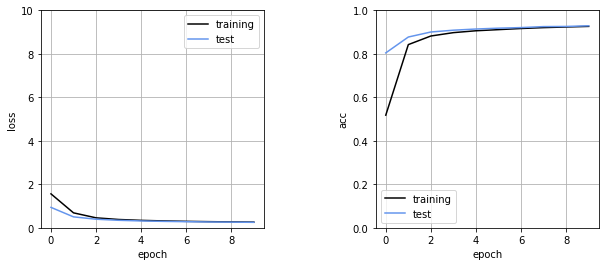

In [30]:

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

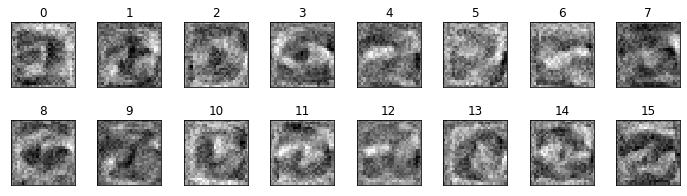

In [31]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

1층의 가중치를 가져와 16개의 가중치를 2 * 8로 그렸다.   
28 * 28 로 하여 그림을 그렸다. 

In [32]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? ㅛ
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#CNN을 사용하기

In [33]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

이번에는 컨볼루션을 활용한다.  
cnn은 사진의 인접한 픽셀에는 인접한 값을 가진 픽셀이 있다는 가정에서 나온 필터이다.      
CNN은 사진 한장을 볼 때 한 개의 필터만 공유해서 사용하기 때문에 mlp의 가중치의 개수가 줄어든다.   
공간적인 부분을 파악할 수 있는 장점도 있다.   
cnn은 이미지를 flatten()할 필요가 없다. 1개의 줄로 만들 필요가 없다. 

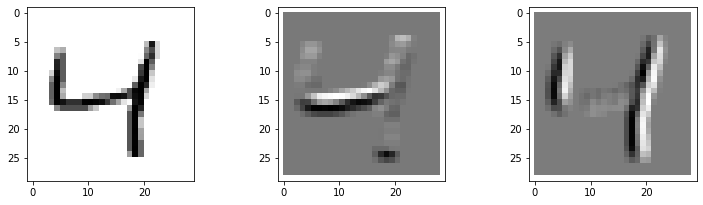

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A)
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B)


x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1)) 


# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [36]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # CNN을 사용
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu')) # (3, 3)의 필터를 8개 사용
model.add(Flatten()) # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 13s 205ms/step - loss: 1.0064 - accuracy: 0.7916 - val_loss: 0.3778 - val_accuracy: 0.8988
Epoch 2/20
60/60 [==============================] - 11s 186ms/step - loss: 0.3297 - accuracy: 0.9069 - val_loss: 0.2772 - val_accuracy: 0.9241
Epoch 3/20
60/60 [==============================] - 13s 211ms/step - loss: 0.2663 - accuracy: 0.9250 - val_loss: 0.2415 - val_accuracy: 0.9338
Epoch 4/20
60/60 [==============================] - 12s 202ms/step - loss: 0.2317 - accuracy: 0.9355 - val_loss: 0.2118 - val_accuracy: 0.9427
Epoch 5/20
60/60 [==============================] - 12s 206ms/step - loss: 0.2041 - accuracy: 0.9435 - val_loss: 0.1911 - val_accuracy: 0.9483
Epoch 6/20
60/60 [==============================] - 11s 188ms/step - loss: 0.1803 - accuracy: 0.9506 - val_loss: 0.1705 - val_accuracy: 0.9533
Epoch 7/20
60/60 [==============================] - 11s 188ms/step - loss: 0.1588 - accuracy: 0.9571 - val_loss: 0.1502 - val_accuracy: 0.9594


-커널은 3 * 3 사용 28 * 28개의 사진위에 커널을 비교하여 하나씩 컨볼루션 연산을 한다.   
cnn은 padding을 이용하여 사진의 크기를 유지할 수 있다.
-cnn은 3차원 사진 그대로 사용할 수 있으나,   
mlp는 그러지 못하기 때문에 flatten()을 활용하여 한줄로 만들어야 한다.  


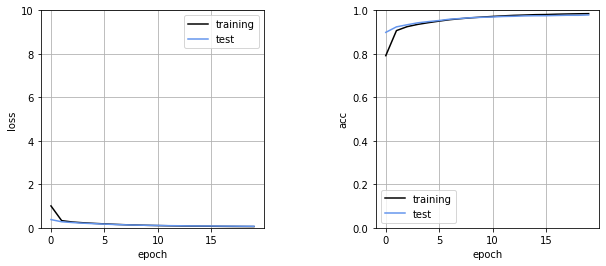

In [37]:
plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

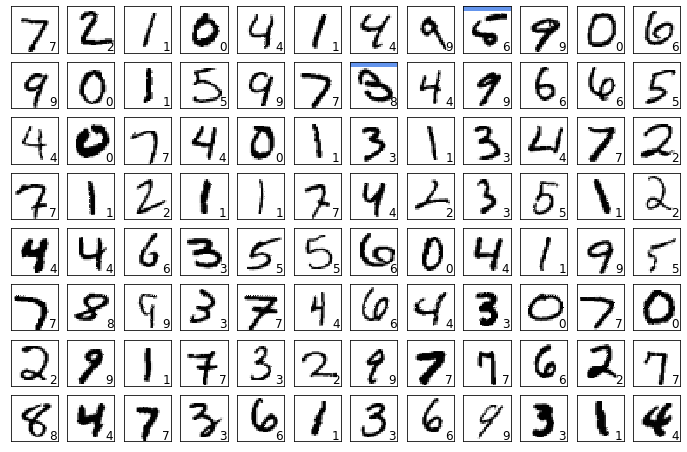

In [38]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")


show_prediction()
plt.show()

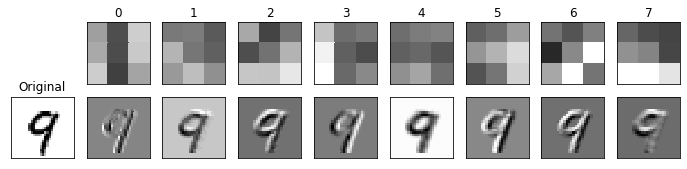

In [39]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

In [40]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 76s 1s/step - loss: 0.6639 - accuracy: 0.7998 - val_loss: 0.1244 - val_accuracy: 0.9634
Epoch 2/20
60/60 [==============================] - 74s 1s/step - loss: 0.1354 - accuracy: 0.9593 - val_loss: 0.0627 - val_accuracy: 0.9809
Epoch 3/20
60/60 [==============================] - 74s 1s/step - loss: 0.0905 - accuracy: 0.9725 - val_loss: 0.0449 - val_accuracy: 0.9851
Epoch 4/20
60/60 [==============================] - 73s 1s/step - loss: 0.0732 - accuracy: 0.9775 - val_loss: 0.0387 - val_accuracy: 0.9879
Epoch 5/20
60/60 [==============================] - 73s 1s/step - loss: 0.0611 - accuracy: 0.9812 - val_loss: 0.0333 - val_accuracy: 0.9887
Epoch 6/20
60/60 [==============================] - 73s 1s/step - loss: 0.0531 - accuracy: 0.9839 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 7/20
60/60 [==============================] - 72s 1s/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.0288 - val_accuracy: 0.9910
Epoch 8/20
60/60 [==

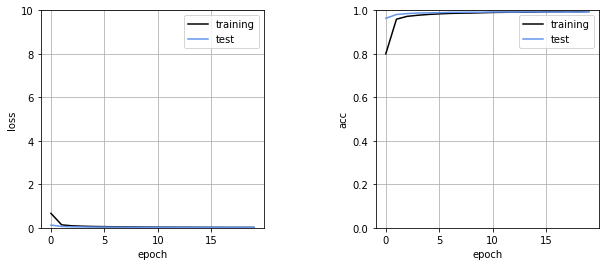

In [41]:
plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

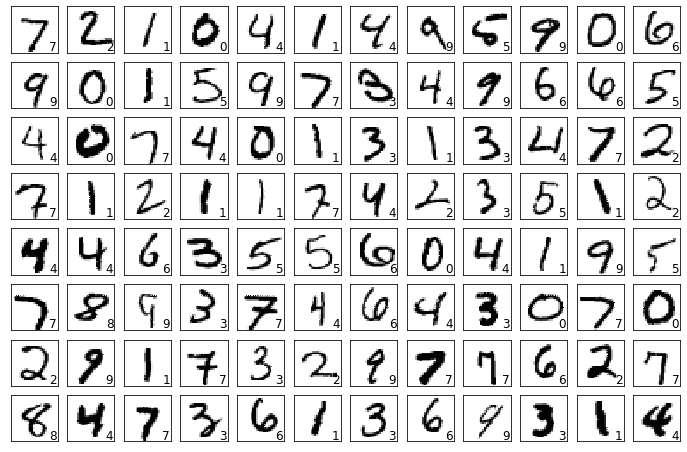

In [42]:
show_prediction()
plt.show()